In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
## Read the data
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

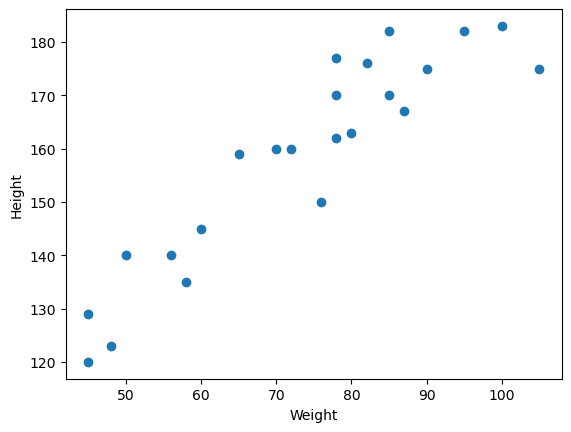

In [37]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [38]:
## Devide dataset into dependent and independent feature
X=df[['Weight']]  ## independent feature
y=df['Height']

In [39]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [40]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [41]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [42]:
X.shape

(23, 1)

In [43]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [44]:
## standardize the train indepenedent feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [45]:
X_train

array([[ 1.82078643],
       [-0.91524433],
       [ 1.52971932],
       [ 0.24902408],
       [-1.49737853],
       [ 0.65651802],
       [-1.6720188 ],
       [-0.79881749],
       [-0.21668329],
       [ 0.13259724],
       [-1.38095169],
       [-1.03167117],
       [-0.10025645],
       [ 0.94758512],
       [ 0.48187776],
       [ 0.65651802],
       [ 0.77294486],
       [ 0.36545092]])

In [46]:
X_test

array([[ 0.24902408],
       [ 0.24902408],
       [-1.6720188 ],
       [ 1.23865222],
       [-0.50775039]])

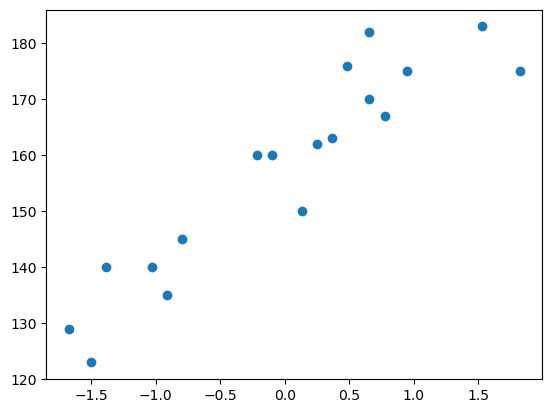

In [47]:
plt.scatter(X_train,y_train)

In [48]:
## Train the model (simple linear regression)
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)


LinearRegression()

In [49]:
regression.coef_

array([16.74767763])

In [50]:
regression.intercept_

np.float64(157.5)

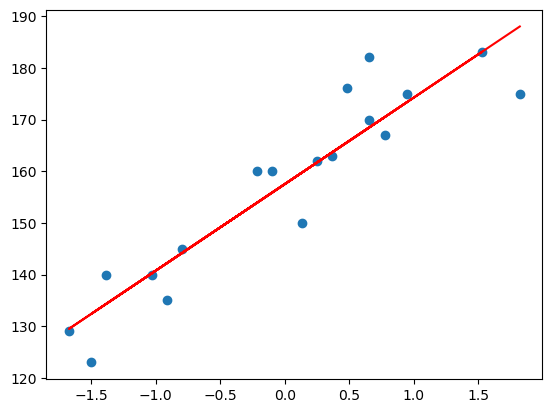

In [51]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),'r')

In [52]:
y_pred_test=regression.predict(X_test)
y_pred_test

array([161.67057495, 161.67057495, 129.49756822, 178.24454811,
       148.99636018])

In [53]:
y_pred_test,y_test

(array([161.67057495, 161.67057495, 129.49756822, 178.24454811,
        148.99636018]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

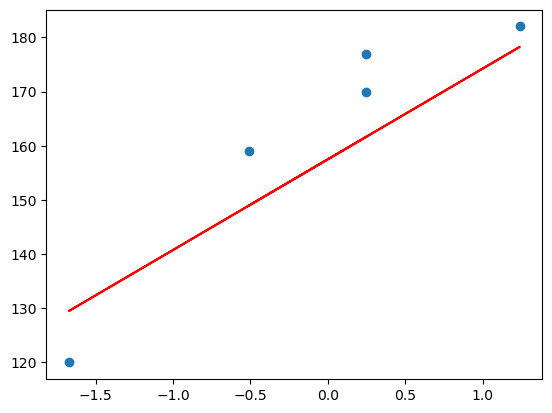

In [54]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test,'r')

In [55]:
## performance metrics
## MSE ,MAE,RMSE
## Rsqaure and adjusted R square
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

101.75012499734628
9.383102009225087
10.087126696802528


In [56]:
score = r2_score(y_test,y_pred_test)
score

0.7932916361991178

In [57]:
## new data point weight is 80
scaled_weight = scaler.transform([[80]])
scaled_weight

c:\Users\anees\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.36545092]])

In [58]:
print('The height prediction for the weight 80KG is:',regression.predict([scaled_weight[0]]))

The height prediction for the weight 80KG is: [163.62045414]


## Assumptions

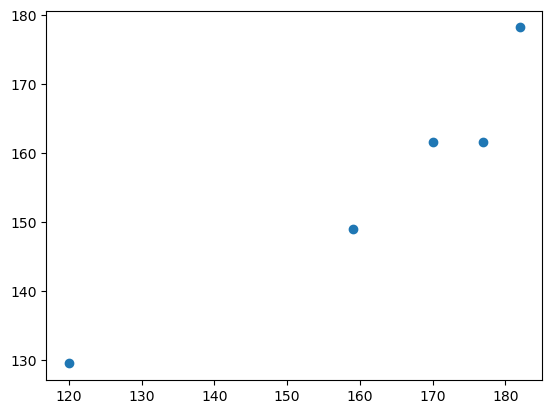

In [59]:
## plot scatter plot for predictions
plt.scatter(y_test,y_pred_test)

## As the plot is linearly distributed so prediction is done well

In [60]:
## Residuals
reseduals = y_test-y_pred_test
reseduals

15    15.329425
9      8.329425
0     -9.497568
8      3.755452
17    10.003640
Name: Height, dtype: float64

C:\Users\anees\AppData\Local\Temp\ipykernel_12716\1546892706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reseduals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

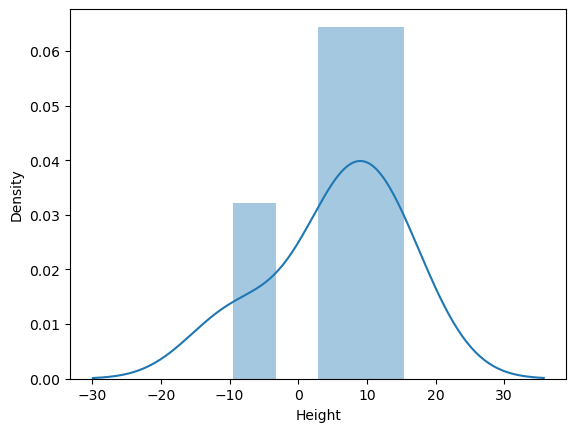

In [61]:
## Plot the residuals
sns.distplot(reseduals,kde=True)

## Getting normal distribution so model is good

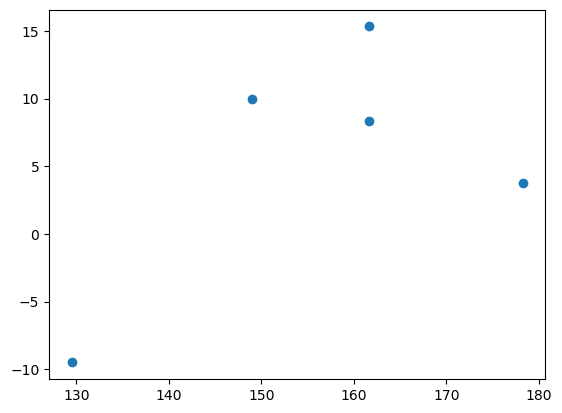

In [62]:
## scatter plot with respect to predictions and residulas
 ## If it is uniformly distrbuted the model is predictiong well
plt.scatter(y_pred_test,reseduals)